**Libraries**

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
from google.colab import files
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

**Pre-processing**

In [55]:
#Reading dataset as pandas dataframe
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/dsl_project_final/development.csv')
url = df['url']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#droping url
df.drop(columns=['url', 'id'],inplace=True)

In [57]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,33.0,1.0,...,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900,bus,tuesday
1,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,NaN,1.0,...,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300,tech,thursday
2,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,4.0,1.0,...,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700,lifestyle,wednesday
3,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,0.0,NaN,...,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500,bus,wednesday
4,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,NaN,0.0,...,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400,tech,thursday


In [58]:
df.shape

(31715, 48)

In [60]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,25340.000000,25384.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,354.058206,10.390730,544.048179,0.530754,0.970140,0.672973,10.865143,3.274381,4.533899,1.259100,...,0.095466,0.756271,-0.259198,-0.521164,-0.107397,0.281647,0.069909,0.341805,0.155974,3407.068863
std,214.314223,2.115643,467.730448,0.137106,0.170203,0.154128,11.295386,3.822364,8.355645,4.176884,...,0.071362,0.247798,0.127508,0.290352,0.094932,0.323834,0.265514,0.188980,0.225957,11899.460219
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,4.000000
25%,163.000000,9.000000,246.000000,0.471276,1.000000,0.626028,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328333,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,338.000000,10.000000,409.000000,0.539568,1.000000,0.690909,7.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.252976,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,713.000000,0.608523,1.000000,0.754644,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186111,-0.300000,-0.050000,0.500000,0.141667,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,1.000000,1.000000,1.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [61]:
# Display data types, unique as well as missing values
a = list(zip(df.columns,df.dtypes,df.nunique(),df.isna().sum()))
B = pd.DataFrame(a,columns=['column','data type','unique values', 'missing values'])
B

,column,data type,unique values,missing values
0,timedelta,float64,724,0
1,n_tokens_title,float64,20,0
2,n_tokens_content,float64,2244,0
3,n_unique_tokens,float64,22948,0
4,n_non_stop_words,float64,1401,0
5,n_non_stop_unique_tokens,float64,19628,0
6,num_hrefs,float64,126,0
7,num_self_hrefs,float64,55,0
8,num_imgs,float64,85,6375
9,num_videos,float64,52,6331


In [62]:
# fill missing values to 0
df = df.fillna(0)

In [63]:
# label encoding for categorical features such as weekdays and data_channel
col_names = ['weekday', 'data_channel']
le_weekday = LabelEncoder()
le_weekday.fit(['monday','tuesday','wednesday','thursday','friday','saturday','sunday'])
weekdays = df['weekday'].copy()
le_weekdays=pd.Series(le_weekday.transform(weekdays),name = 'weekday')
le_dc = LabelEncoder()
le_data_channel = pd.Series(le_dc.fit_transform(df['data_channel']),name ='data_channel')
df = df.drop(columns = col_names)

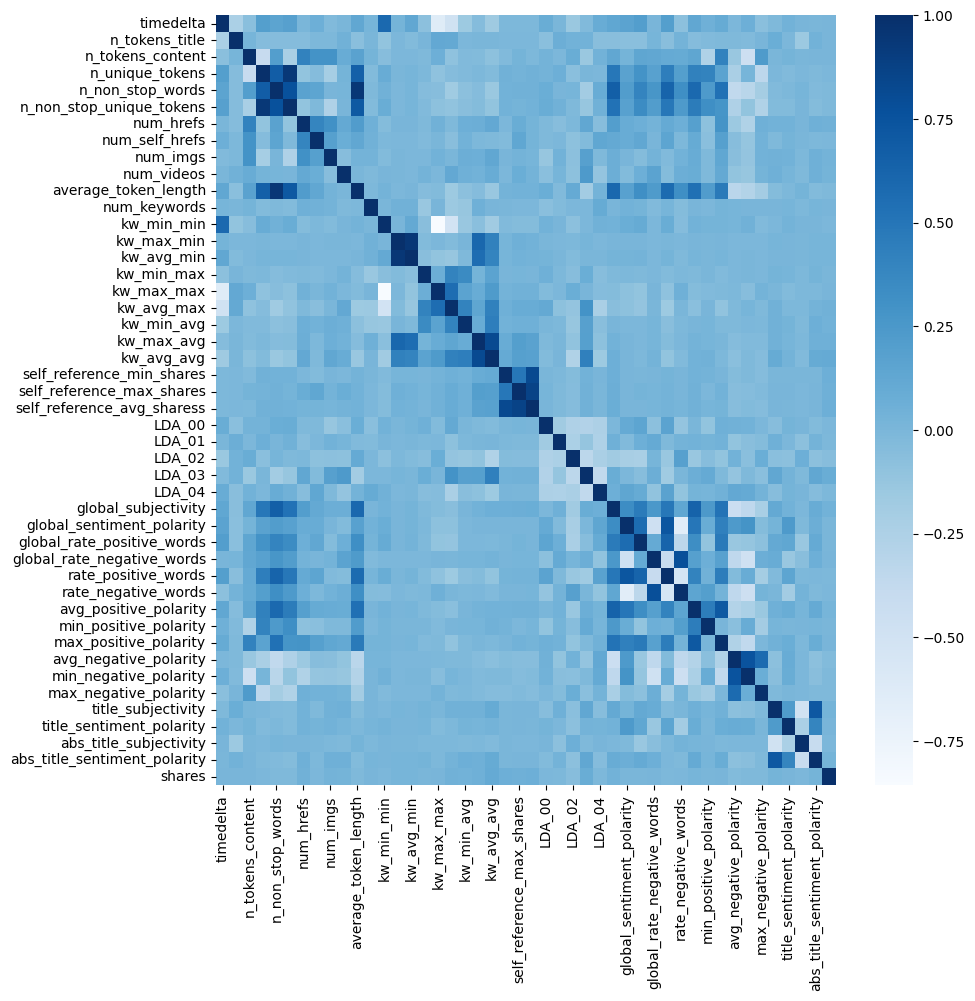

In [64]:
# Feature correlation
plt.figure(figsize=(10,10))
cor=df.corr()
sns.heatmap(cor,annot=False ,cmap=plt.cm.Blues)
plt.show()

In [65]:
#removing outliers
Q1 = df.quantile(q=0.25)

Q3 = df.quantile(q=0.75)

IQR = Q3-Q1
print('IQR for each column:- ')
print(IQR)

IQR for each column:- 
timedelta                       3.790000e+02
n_tokens_title                  3.000000e+00
n_tokens_content                4.670000e+02
n_unique_tokens                 1.372475e-01
n_non_stop_words                4.309000e-09
n_non_stop_unique_tokens        1.286165e-01
num_hrefs                       1.000000e+01
num_self_hrefs                  3.000000e+00
num_imgs                        2.000000e+00
num_videos                      1.000000e+00
average_token_length            3.755691e-01
num_keywords                    4.000000e+00
kw_min_min                      5.000000e+00
kw_max_min                      5.550000e+02
kw_avg_min                      2.153804e+02
kw_min_max                      7.800000e+03
kw_max_max                      0.000000e+00
kw_avg_max                      1.584514e+05
kw_min_avg                      2.056403e+03
kw_max_avg                      2.459408e+03
kw_avg_avg                      1.217825e+03
self_reference_min_shares       

In [66]:
sorted_shares = df.sort_values('shares')

median = sorted_shares['shares'].median()

q1 = sorted_shares['shares'].quantile(q=0.25)

q3 = sorted_shares['shares'].quantile(q=0.75)

iqr = q3-q1

In [67]:
Inner_bound1 = q1-(iqr*1.5)
print(f'Inner Boundary 1 = {Inner_bound1}')
Inner_bound2 = q3+(iqr*1.5)
print(f'Inner Boundary 2 = {Inner_bound2}')
Outer_bound1 = q1-(iqr*3)
print(f'Outer Boundary 1 = {Outer_bound1}')
Outer_bound2 = q3+(iqr*3)
print(f'Outer Boundary 2 = {Outer_bound2}')

Inner Boundary 1 = -1835.0
Inner Boundary 2 = 5581.0
Outer Boundary 1 = -4616.0
Outer Boundary 2 = 8362.0


In [68]:
# Outliers removal step can be added or skipped to the pre processing pipeline based on the final score (Hit and trial).
#df_1 = df[df['shares']<=Outer_bound2]
df_1=df.copy()

In [69]:
print(f'Data before Removing Outliers = {df.shape}')
print(f'Data after Removing Outliers = {df_1.shape}')
print(f'Number of Outliers = {df.shape[0] - df_1.shape[0]}')

Data before Removing Outliers = (31715, 46)
Data after Removing Outliers = (31715, 46)
Number of Outliers = 0


**Visualization**

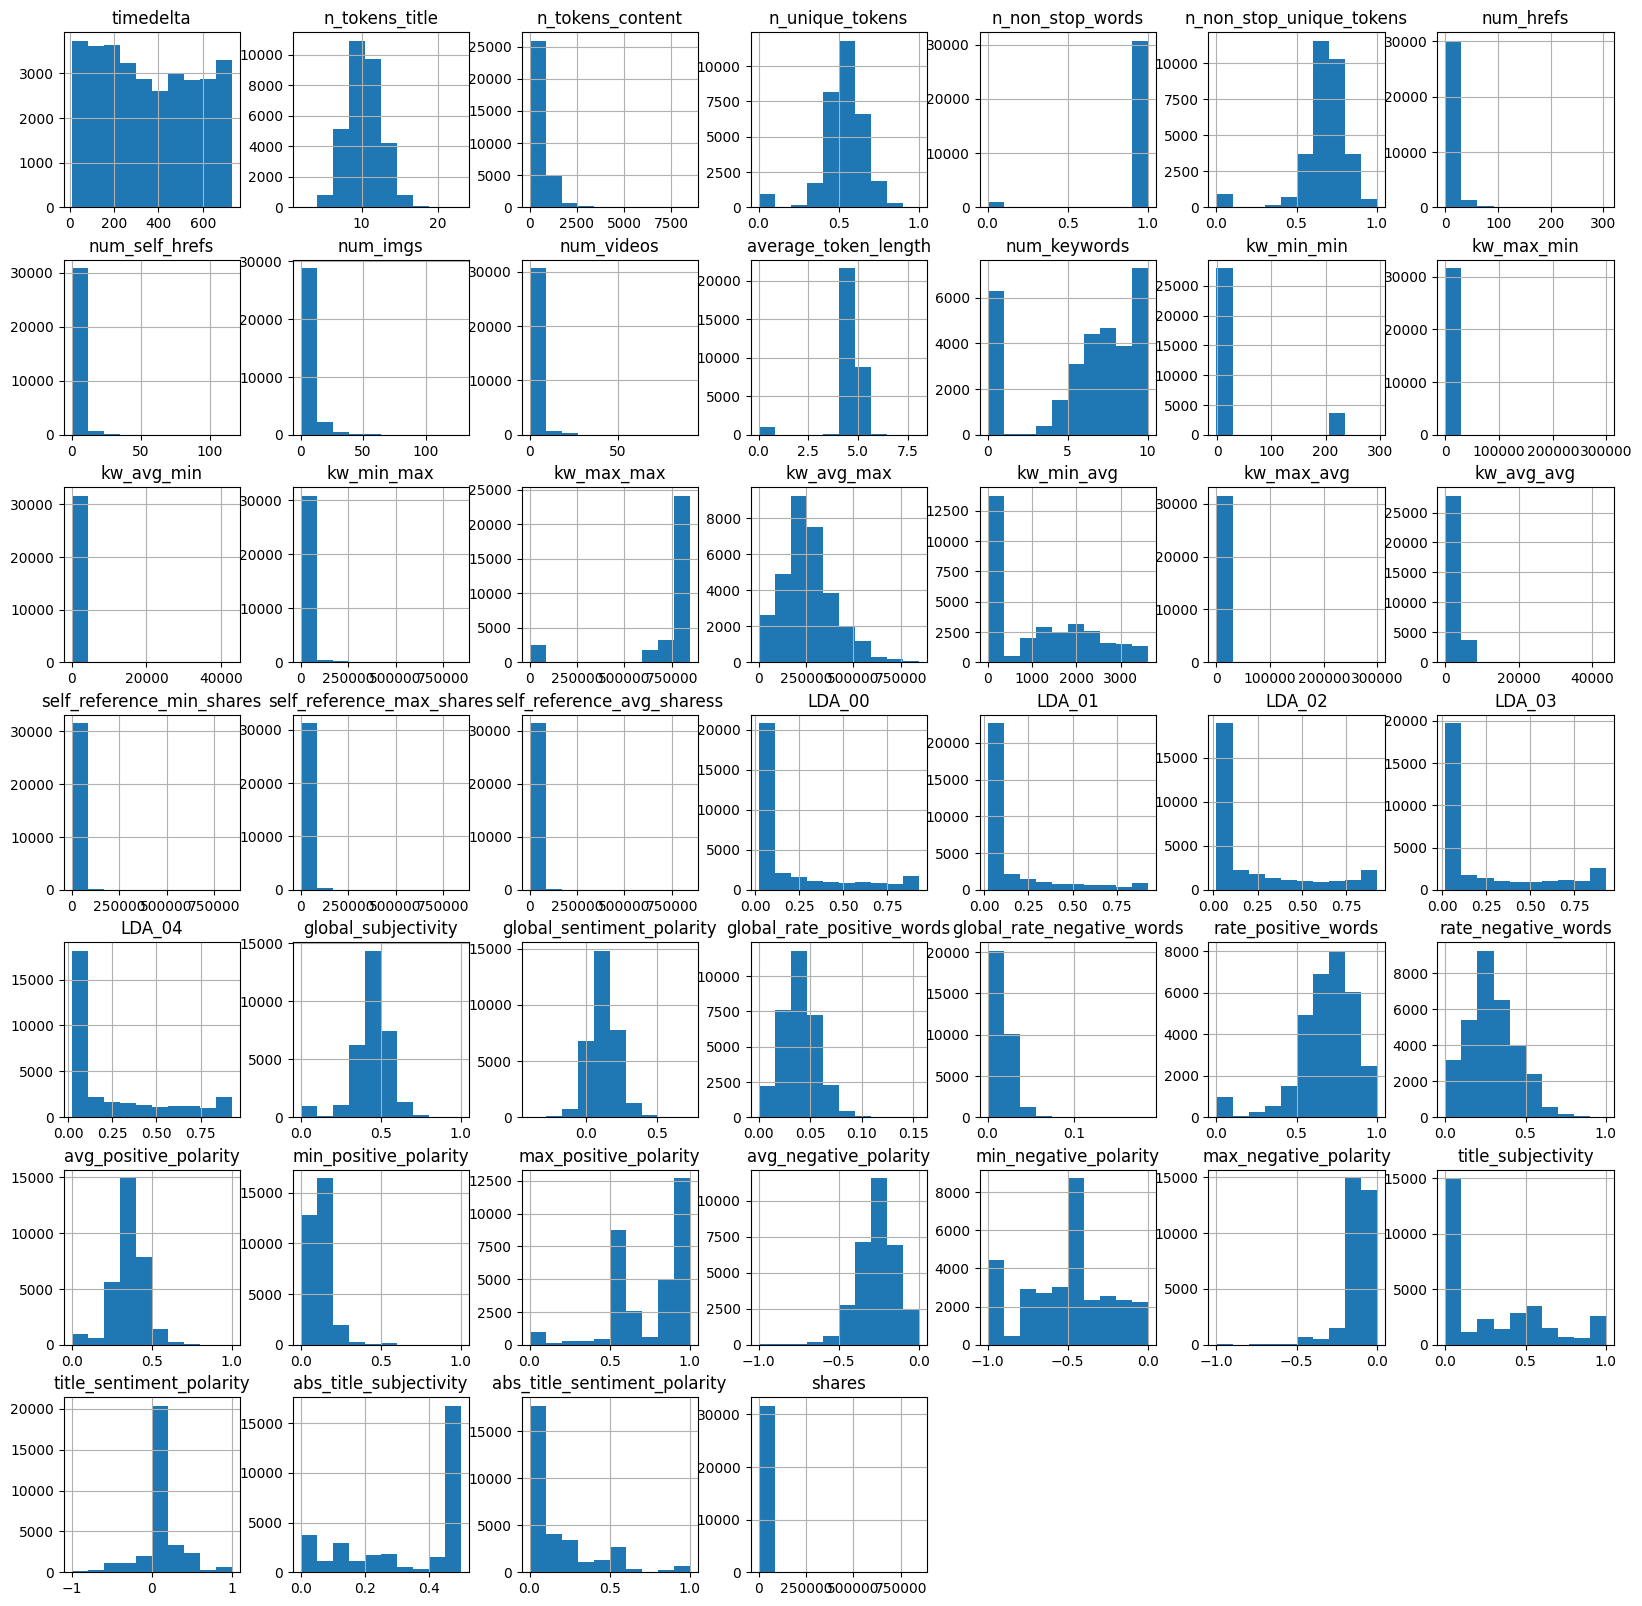

In [70]:
df_1.hist(figsize=(20,20))
plt.show()

**Feature Scaling**

In [71]:
# Choice to make weather to apply min max scaler or standard scaler, However scaling is important since features have different range of values
y = df_1['shares']
X = df_1.drop('shares',axis=1)

#scaler=MinMaxScaler()
scaler = StandardScaler()
X_scalarized=scaler.fit_transform(X)

**Principal Component Analysis (PCA)**

In [72]:
pca = PCA(.99)
X_pca = pca.fit_transform(X_scalarized)

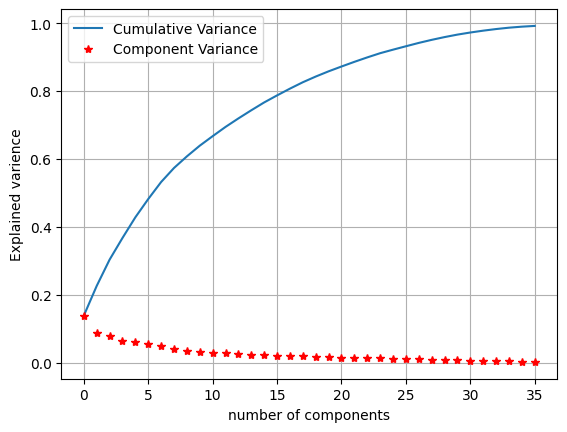

In [73]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_,'r*')
plt.xlabel('number of components')
plt.ylabel('Explained varience');
plt.legend(['Cumulative Variance', 'Component Variance'])
plt.grid()

**Extracting metadata from url**

In [74]:
url1 = url.str.rsplit('/')
for i,val in enumerate(url1):
  url1[i] = val[-2]
url1 = url1.str.replace('-',' ')

url1 = url1.fillna(' ')
#url1 = url1[df['shares']<=Outer_bound2]

**Word Cloud**

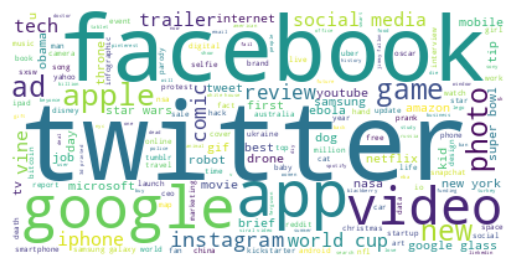

In [75]:
from wordcloud import WordCloud
# Start with one review:
text = " ".join(text for text in url1)

# Create and generate a word cloud image:
wordcloud = WordCloud( background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Exracting date from Url**

In [76]:
url2 = url.str.rsplit('.com/')
url2 = url2.fillna(' ')
#url2 = url2[df['shares']<=Outer_bound2]
url3 = url2.copy()

for i,val in enumerate(url2):
  url3.iloc[i] = (val[1].split('/'))[0:3]
url3 = pd.DataFrame(url3.to_list(), columns=['year','month','day'])
url3=url3.fillna('')
for col in url3.columns:
  url3[col] = url3[col].astype(int)


**TF-IDF vectorizer**

In [77]:
vectorizer = CountVectorizer(stop_words='english',max_features = 20)
X_tf = vectorizer.fit_transform(url1)


In [78]:
#le_weekdays = le_weekdays[df['shares']<=Outer_bound2]
#le_data_channel = le_data_channel[df['shares']<=Outer_bound2]
B=le_weekdays [:,np.newaxis]
C = le_data_channel[:,np.newaxis]


<ipython-input-78-f6492ff27bde>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  B=le_weekdays [:,np.newaxis]
<ipython-input-78-f6492ff27bde>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  C = le_data_channel[:,np.newaxis]


In [79]:
B.shape

(31715, 1)

**Concatenating all arrays for training**

In [80]:
#X = np.concatenate([X_pca, X_tf.toarray(),url3.values,B,C], axis = 1)
X = np.concatenate([X_scalarized, X_tf.toarray(),url3.values,B,C], axis = 1)

In [81]:
X_pca.shape

(31715, 36)

In [82]:
y.shape

(31715,)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Linear regression**

In [84]:
reg_lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = reg_lr.predict(X_test)
sqrt(mean_squared_error(y_pred_lr,y_test))

12020.556978642247

**Lasso**

In [85]:
from sklearn import linear_model
reg_las = linear_model.Lasso(alpha=0.5)
reg_las.fit(X_train,y_train)
y_pred_las = reg_las.predict(X_test)
sqrt(mean_squared_error(y_pred_las,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.380e+09, tolerance: 2.948e+08
  model = cd_fast.enet_coordinate_descent(


12019.562723872554

**Ridge**

In [86]:
from sklearn import linear_model
reg_rg = linear_model.Ridge(alpha=0.5)
reg_rg.fit(X_train,y_train)
y_pred_rg = reg_rg.predict(X_test)
sqrt(mean_squared_error(y_pred_rg,y_test))

12020.182828900073

**Decision Tree**

In [87]:
regr_dt = DecisionTreeRegressor(max_depth=30)
regr_dt.fit(X_train, y_train)
y_pred_dt = regr_dt.predict(X_test)
sqrt(mean_squared_error(y_pred_dt,y_test))


14436.736971156186

**Random forest**

In [88]:
regr_rf = RandomForestRegressor(max_depth=2, random_state=0)
regr_rf.fit(X_train, y_train)
y_pred_rf = regr_rf.predict(X_test)
sqrt(mean_squared_error(y_pred_rf,y_test))

12083.379423407523

**Grid Search**

In [89]:
param_grid = {
    'max_depth' : [10,30,40,50]
}

In [90]:
CV_dt = GridSearchCV(estimator=regr_dt, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=30),
             param_grid={'max_depth': [10, 30, 40, 50]})

In [91]:
CV_dt.best_params_

{'max_depth': 10}

In [92]:
regr_dt = DecisionTreeRegressor(max_depth=10)
regr_dt.fit(X_train, y_train)
y_pred_dt = regr_dt.predict(X_test)
sqrt(mean_squared_error(y_pred_dt,y_test))


15611.844366157271

**Evaluation**

In [93]:
X_eval = pd.read_csv('/content/drive/MyDrive/dsl_project_final/evaluation.csv')
id = X_eval['id']

In [94]:
url1 = X_eval['url']
url1 = url1.str.rsplit('/')
for i,val in enumerate(url):
    url[i] = val[-2]
url1 = url1.str.replace('-',' ')
url1 = url1.fillna(' ')
url1.shape

(7917,)

In [95]:
url =  X_eval['url']
url2 = url.str.rsplit('.com/')
url2 = url2.fillna(' ')
#url2 = url2[df['shares']<=Outer_bound2]
url3 = url2.copy()

for i,val in enumerate(url2):
  url3.iloc[i] = (val[1].split('/'))[0:3]
url3 = pd.DataFrame(url3.to_list(), columns=['year','month','day'])
#url3 = url3[df['shares']<=Outer_bound2]
url3=url3.fillna('')
for col in url3.columns:
  url3[col] = url3[col].astype(int)

In [96]:
X_eval = X_eval.drop(columns = ['id','url'])
X_eval=X_eval.fillna(0)
le_data_channel = pd.Series(le_dc.transform(X_eval['data_channel']),name ='data_channel')
le_weekdays=pd.Series(le_weekday.transform(X_eval['weekday']),name = 'weekday')
#le_weekdays = le_weekdays[df['shares']<=Outer_bound2]
#le_data_channel = le_data_channel[df['shares']<=Outer_bound2]
B=le_weekdays [:,np.newaxis]
C = le_data_channel[:,np.newaxis]
X_tf =  vectorizer.transform(url)
X_eval = X_eval.drop(columns = col_names)
#X_eval = pd.concat([X_eval,le_weekdays, le_data_channel], axis = 1)
X_eval_scalerized = scaler.transform(X_eval)
X_eval_pca = pca.transform(X_eval_scalerized)
X = np.concatenate((X_eval_scalerized, X_tf.toarray(),url3.values,B,C), axis=1)

<ipython-input-96-9d10606a8f2a>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  B=le_weekdays [:,np.newaxis]
<ipython-input-96-9d10606a8f2a>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  C = le_data_channel[:,np.newaxis]


In [97]:
y_eval =pd.Series( reg_lr.predict(X))

In [98]:
Predictions=pd.concat({'Id': id,
              'Predicted': y_eval},axis=1)

In [99]:
pd.DataFrame(Predictions).to_csv('/content/predictions.csv',index = None)

In [100]:
Predictions

,Id,Predicted
0,31715,3303.627849
1,31716,2809.127849
2,31717,1303.969402
3,31718,2081.999919
4,31719,3475.038005
...,...,...
7912,39639,3111.915447
7913,39640,4046.063884
7914,39641,853.102214
7915,39642,2502.876384


**Download Final Output CSV File**

In [101]:
files.download('/content/predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>